In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM 
import datetime
import matplotlib.pyplot as plt
import os 
import shutil

In [2]:
%load_ext tensorboard

In [48]:
# shutil.rmtree('.\logs')

In [5]:
def check_100(data_set):
    logic = np.sum(data_set,axis=1)>=100
    return logic*1

### a) Create the train and validation data.

In [6]:
train_set = np.random.randint(0,10,[8000,30])
label_train = check_100(train_set)
train_set = train_set.reshape(8000,30,1)

val_set = np.random.randint(0,10,[2000,30])
label_val = check_100(val_set)
val_set = val_set.reshape(2000,30,1)

### b) Build a recurrent network for number series classification.

In [9]:
model_lstm = keras.models.Sequential()

model_lstm.add(LSTM(
    units=200,
    input_shape=(train_set.shape[1:]),
    name='LSTM',
    return_sequences = False   # we may return sequences if we need more LSTM layers. This way,
                               # we only return the last output of network.

)) 

model_lstm.add(Dense(
    units=1,
    activation='sigmoid',
    name='output',
    use_bias=False
))

opt_adam = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
)

model_lstm.compile(optimizer=opt_adam,
              loss ='binary_crossentropy', 
              metrics = 'accuracy')

summ =model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM (LSTM)                  (None, 200)               161600    
_________________________________________________________________
output (Dense)               (None, 1)                 200       
Total params: 161,800
Trainable params: 161,800
Non-trainable params: 0
_________________________________________________________________


### c) Train your model.

In [10]:
log_dir = "logs/fit/model_lstm" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_lstm.fit(
    x=train_set,
    y=label_train,
    batch_size=50,
    epochs=60,
    callbacks = [tensorboard_callback],
    validation_split = 0.2,
    validation_data=(val_set, label_val),
    shuffle=True,
    verbose=2, # print one line per epoch
    
)

Epoch 1/60
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
128/128 - 6s - loss: 0.0634 - accuracy: 0.9820 - val_loss: 0.0266 - val_accuracy: 0.9919
Epoch 2/60
128/128 - 5s - loss: 0.0478 - accuracy: 0.9898 - val_loss: 0.0534 - val_accuracy: 0.9912
Epoch 3/60
128/128 - 5s - loss: 0.0487 - accuracy: 0.9895 - val_loss: 0.0214 - val_accuracy: 0.9925
Epoch 4/60
128/128 - 5s - loss: 0.0490 - accuracy: 0.9898 - val_loss: 0.0491 - val_accuracy: 0.9912
Epoch 5/60
128/128 - 4s - loss: 0.0436 - accuracy: 0.9887 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 6/60
128/128 - 4s - loss: 0.0295 - accuracy: 0.9898 - val_loss: 0.0200 - val_accuracy: 0.9919
Epoch 7/60
128/128 - 5s - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0169 - val_accuracy: 0.9950
Epoch 8/60
128/128 - 4s - loss: 0.0315 - accuracy: 0.9884 - val_loss: 0.0228 - val_accuracy: 0.9956
Epoch 9/60
128/128 - 4s - loss: 0.0257 - accuracy: 0.9894 - val_loss: 0.0145 - val_accuracy: 0.9962
Epoch 10/60
128/128 - 4s - l

In [13]:
model_lstm.save(log_dir[9::]+'.model') # save the trained model (Martin)

INFO:tensorflow:Assets written to: model_lstm20201228-143747.model\assets


## 1) Evaluate the final accuracy of the model on the validation data.

In [16]:
# %tensorboard --logdir /logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 4384.

The final validation accuracy is 0.9981250166893005


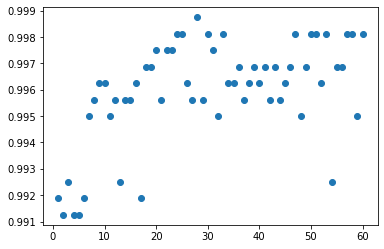

In [33]:
val_acc = history.history['val_accuracy']
ind = np.arange(1,len(val_acc)+1,1)
plt.scatter(ind,val_acc)

print('The final validation accuracy is ' + str(val_acc[-1]))

## 2) Discuss the validity of the accuracy measure in relation to that distribution and possible alternatives.

In [47]:
perc_neg = sum(label_train==0)/len(label_train)*100
perc_pos = 100-perc_neg

perc_neg_val = sum(label_val==0)/len(label_val)*100
perc_pos_val = 100-perc_neg_val

print('The percentage of training negative cases is ' + str(perc_neg) + ' and the percentage of validation negative cases is ' + str(perc_neg_val))

The percentage of training negative cases is 1.0125 and the percentage of validation negative cases is 1.15


That means that almost every possible sum will yield a positive outcome and for computational sake, it would be easier to implement a function that says that all series have a sum >= 100, with a probable accuracy of ~ 99 %.